<a href="https://colab.research.google.com/github/meherunnisa01/AirbnbListing/blob/main/AirbnbListing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('/content/listings.csv')

# Show the first few rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,621960198566758900,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,NaN,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,NaN
1,932642358896439621,Stylish top floor apt w/parking,232967878,Diana,NaN,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,NaN
2,53567589,Private Garden Apt in Downtown Albany|Pets All...,433096110,Brian,NaN,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,NaN
3,20671966,The Metropolitan,98744672,Bela,NaN,NINTH WARD,42.65532,-73.78244,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,NaN
4,24606880,The Western Suite,98744672,Bela,NaN,NINTH WARD,42.65431,-73.78178,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,NaN


In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,621960198566758900,The Historic Jesse Buel Farmhouse w/ Heated Pool,382970529,Thomas,NaN,FOURTEENTH WARD,42.66762,-73.79919,Entire home/apt,882.0,1,15,2025-02-06,0.47,12,330,8,NaN
1,932642358896439621,Stylish top floor apt w/parking,232967878,Diana,NaN,THIRTEENTH WARD,42.67224,-73.79301,Entire home/apt,106.0,1,37,2025-02-15,1.88,23,86,26,NaN
2,53567589,Private Garden Apt in Downtown Albany|Pets All...,433096110,Brian,NaN,SIXTH WARD,42.65204,-73.76655,Entire home/apt,99.0,1,251,2025-02-23,6.40,4,341,73,NaN
3,20671966,The Metropolitan,98744672,Bela,NaN,NINTH WARD,42.65532,-73.78244,Entire home/apt,58.0,2,46,2025-01-19,0.51,8,248,7,NaN
4,24606880,The Western Suite,98744672,Bela,NaN,NINTH WARD,42.65431,-73.78178,Private room,50.0,2,48,2025-02-27,0.62,8,340,9,NaN


In [ ]:
# Fill numeric NaNs with mean
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)

# Fill object (text) NaNs with mode
df.fillna(df.select_dtypes(include=['object']).mode().iloc[0], inplace=True)

# Check info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              424 non-null    int64  
 1   name                            424 non-null    object 
 2   host_id                         424 non-null    int64  
 3   host_name                       424 non-null    object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   424 non-null    object 
 6   latitude                        424 non-null    float64
 7   longitude                       424 non-null    float64
 8   room_type                       424 non-null    object 
 9   price                           424 non-null    float64
 10  minimum_nights                  424 non-null    int64  
 11  number_of_reviews               424 non-null    int64  
 12  last_review                     424 

In [ ]:
# Compute an "overall" score by averaging 'number_of_reviews' and 'reviews_per_month'
df['overall'] = (df['number_of_reviews'] + df['reviews_per_month']) / 2

# Display the relevant columns
print(df[['number_of_reviews', 'reviews_per_month', 'overall']].head())


   number_of_reviews  reviews_per_month  overall
0                 15               0.47    7.735
1                 37               1.88   19.440
2                251               6.40  128.700
3                 46               0.51   23.255
4                 48               0.62   24.310


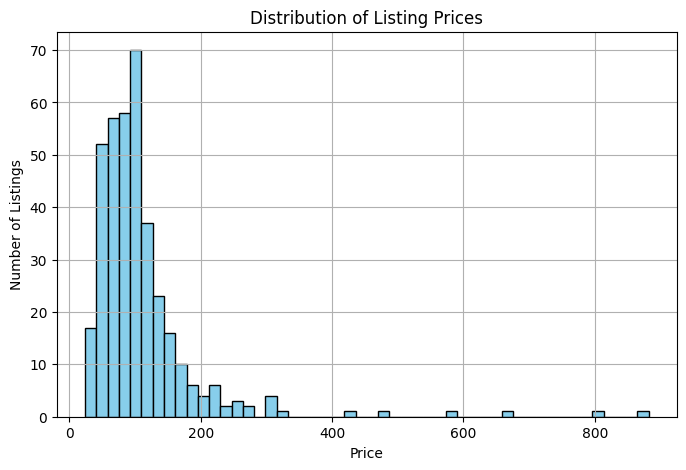

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Clean and convert price column
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Plot histogram
plt.figure(figsize=(8,5))
df['price_clean'].dropna().plot.hist(bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

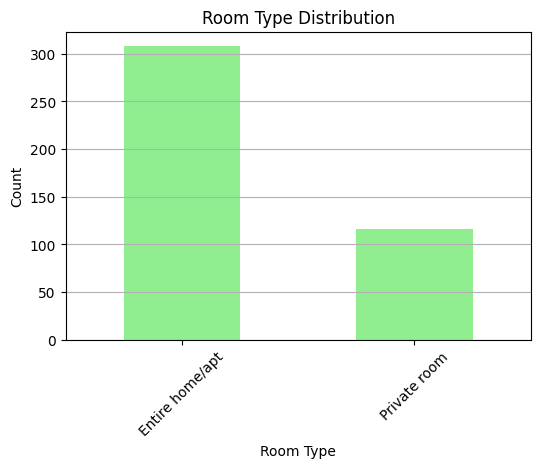

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Plot bar chart
plt.figure(figsize=(6,4))
df['room_type'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

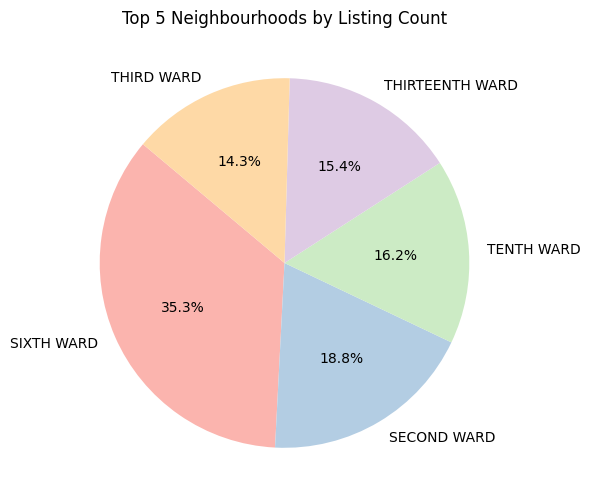

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Get top 5 neighbourhoods
top_neighbourhoods = df['neighbourhood'].value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(6,6))
top_neighbourhoods.plot.pie(autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Neighbourhoods by Listing Count')
plt.ylabel('')
plt.show()

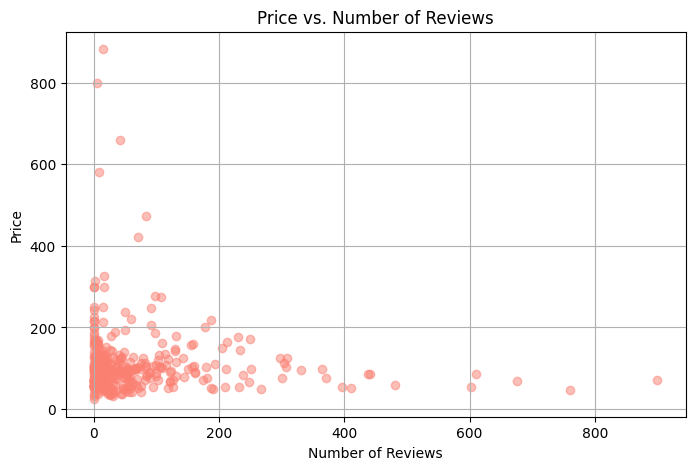

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Clean and convert price column
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Plot scatter
plt.figure(figsize=(8,5))
plt.scatter(df['number_of_reviews'], df['price_clean'], alpha=0.5, color='salmon')
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.grid(True)
plt.show()

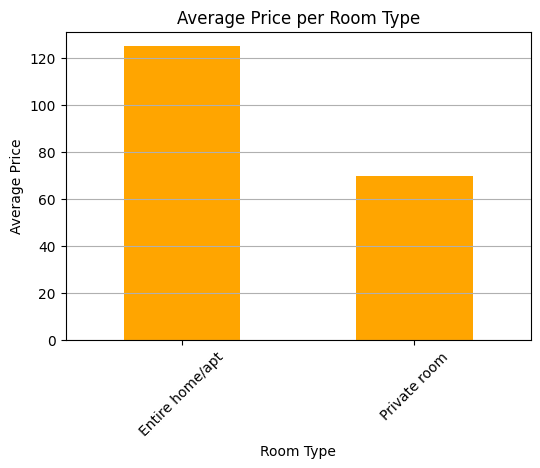

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Group by room type
avg_price = df.groupby('room_type')['price_clean'].mean()

# Plot
plt.figure(figsize=(6,4))
avg_price.plot(kind='bar', color='orange')
plt.title('Average Price per Room Type')
plt.ylabel('Average Price')
plt.xlabel('Room Type')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

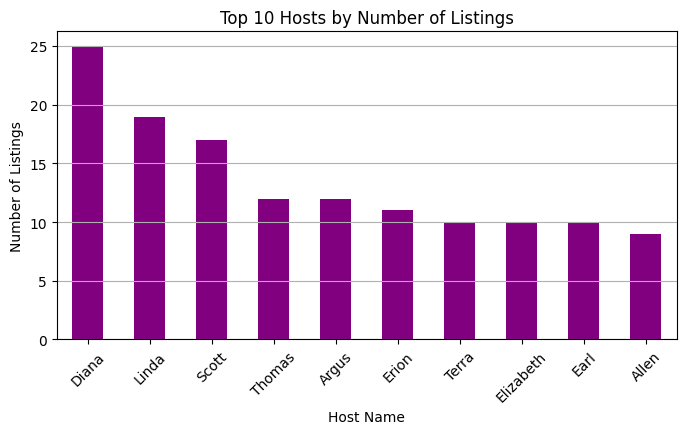

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Top 10 hosts by number of listings
top_hosts = df['host_name'].value_counts().head(10)

# Plot
plt.figure(figsize=(8,4))
top_hosts.plot(kind='bar', color='purple')
plt.title('Top 10 Hosts by Number of Listings')
plt.ylabel('Number of Listings')
plt.xlabel('Host Name')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

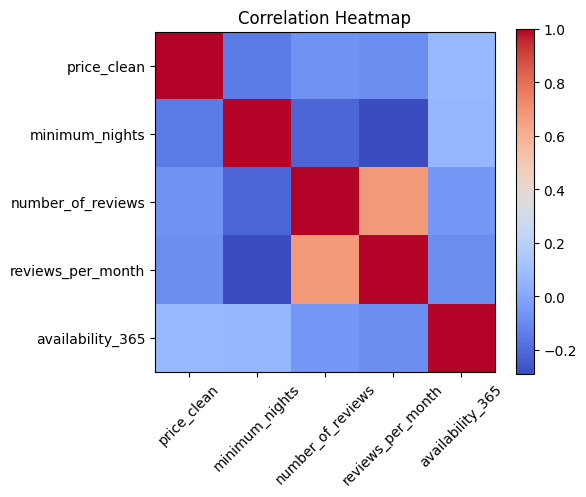

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Selecting numeric columns
num_df = df[['price_clean', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365']]

# Correlation matrix
corr = num_df.corr()

# Plot heatmap manually
plt.figure(figsize=(6,5))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

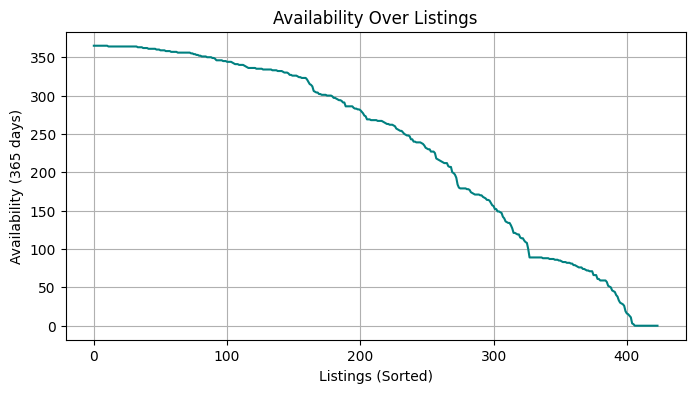

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Sort by availability
sorted_df = df.sort_values(by='availability_365', ascending=False)

# Plot
plt.figure(figsize=(8,4))
plt.plot(sorted_df['availability_365'].reset_index(drop=True), color='teal')
plt.title('Availability Over Listings')
plt.xlabel('Listings (Sorted)')
plt.ylabel('Availability (365 days)')
plt.grid(True)
plt.show()

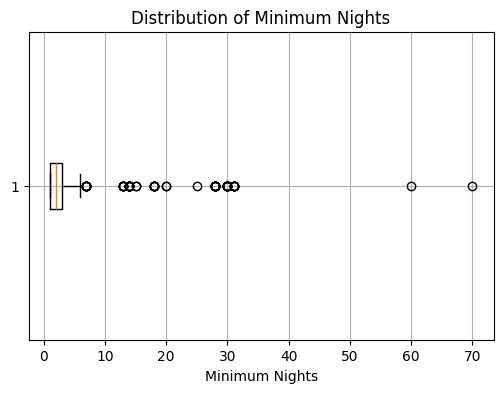

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Boxplot to see distribution and outliers
plt.figure(figsize=(6,4))
plt.boxplot(df['minimum_nights'].dropna(), vert=False)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.grid(True)
plt.show()

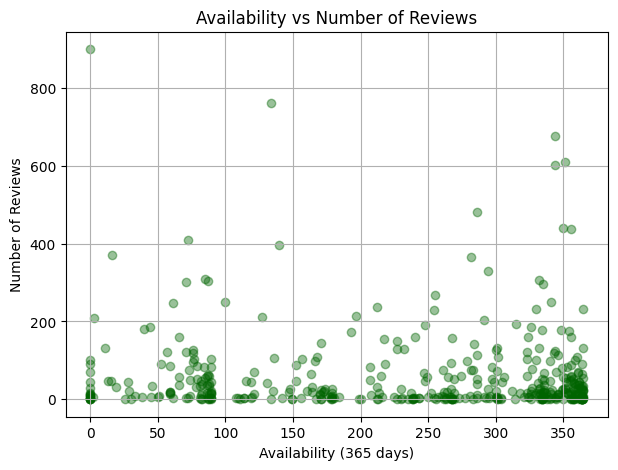

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

plt.figure(figsize=(7,5))
plt.scatter(df['availability_365'], df['number_of_reviews'], alpha=0.4, color='darkgreen')
plt.title('Availability vs Number of Reviews')
plt.xlabel('Availability (365 days)')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

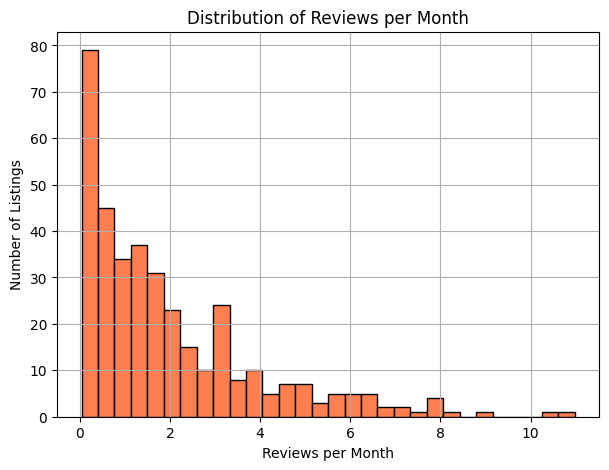

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

plt.figure(figsize=(7,5))
df['reviews_per_month'].dropna().plot.hist(bins=30, color='coral', edgecolor='black')
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

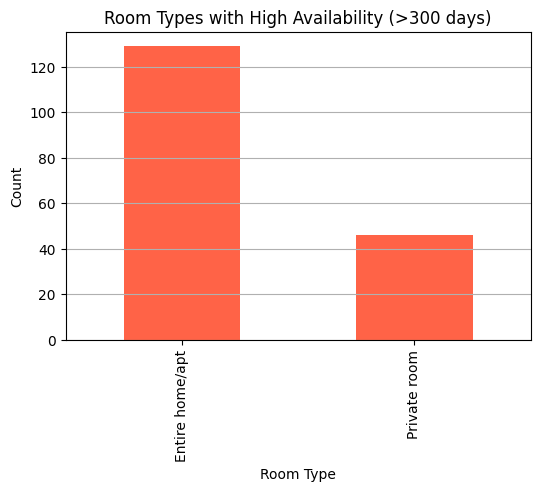

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Filter listings with availability > 300
high_avail = df[df['availability_365'] > 300]
top_high_avail = high_avail['room_type'].value_counts()

plt.figure(figsize=(6,4))
top_high_avail.plot(kind='bar', color='tomato')
plt.title('Room Types with High Availability (>300 days)')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

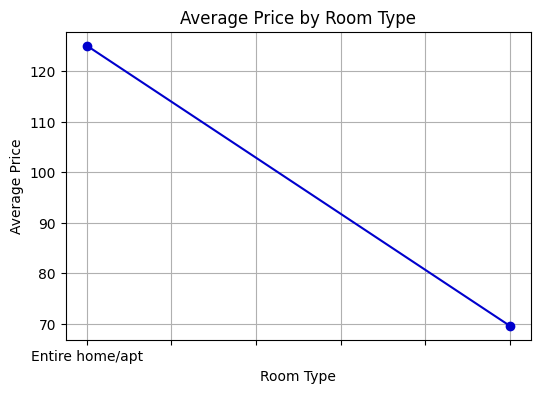

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

# Group by room type and calculate mean price
avg_price_by_room = df.groupby('room_type')['price_clean'].mean()

# Line plot
plt.figure(figsize=(6,4))
avg_price_by_room.plot(marker='o', linestyle='-', color='mediumblue')
plt.title('Average Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

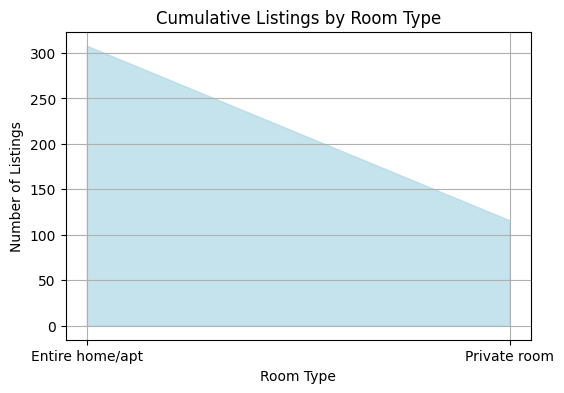

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')

# Count listings per room type
room_type_counts = df['room_type'].value_counts().sort_index()

# Area chart
plt.figure(figsize=(6,4))
plt.fill_between(room_type_counts.index, room_type_counts.values, color='lightblue', alpha=0.7)
plt.title('Cumulative Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()

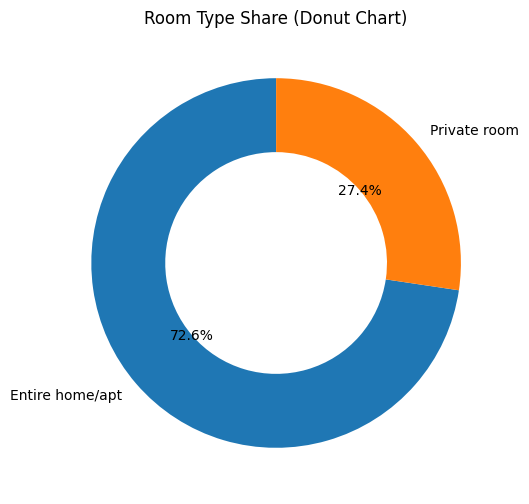

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
room_counts = df['room_type'].value_counts()

# Donut chart
plt.figure(figsize=(6,6))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'width':0.4})
plt.title('Room Type Share (Donut Chart)')
plt.show()

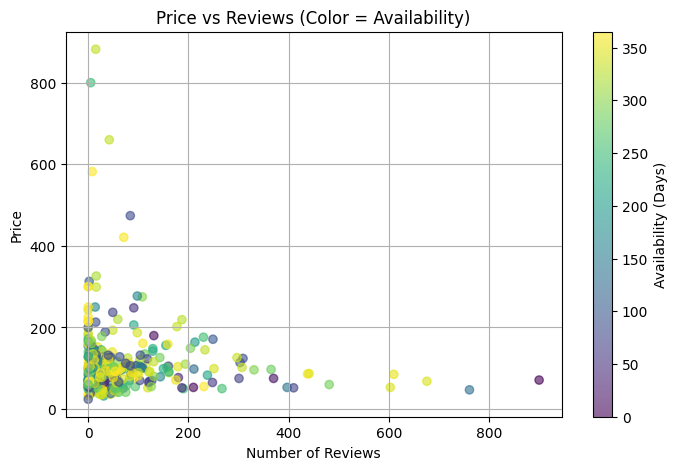

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/listings.csv')
df['price_clean'] = df['price'].astype(str).replace('[\$,]', '', regex=True).astype(float)

plt.figure(figsize=(8,5))
scatter = plt.scatter(df['number_of_reviews'], df['price_clean'], c=df['availability_365'], cmap='viridis', alpha=0.6)
plt.title('Price vs Reviews (Color = Availability)')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.colorbar(scatter, label='Availability (Days)')
plt.grid(True)
plt.show()